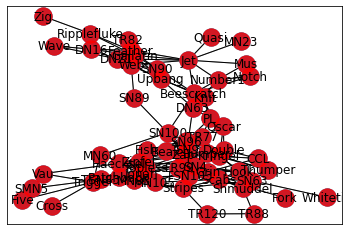

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']
['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'PL', 'Patchback', 'Quasi', 'Ripplefluke', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Scabs', 'Shmuddel', 'Stripes', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99'

e:\Users\huangbo\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


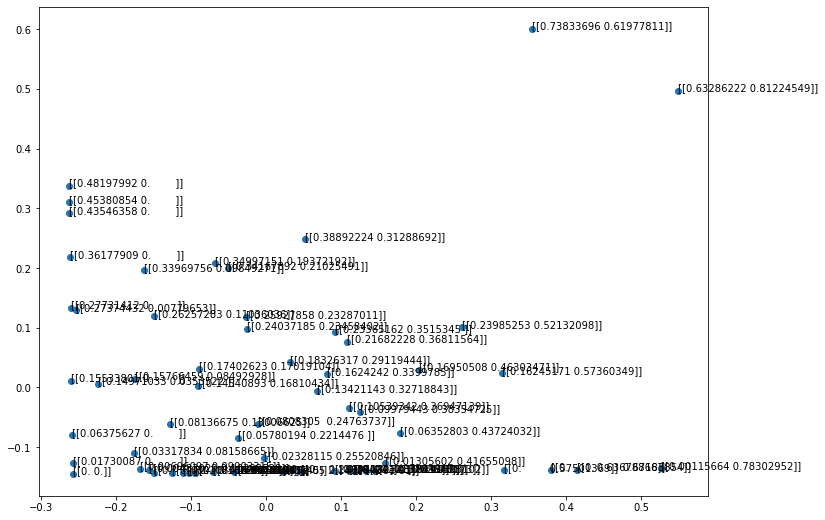

output(去掉relu)=
: [[-5.30140590e-02 -7.91587124e-02]
 [ 3.68759414e-01 -1.36524418e-01]
 [-2.04079424e-01  8.47221822e-02]
 [-7.53984597e-01  6.78796835e-01]
 [ 7.84094413e-03  4.42754963e-01]
 [-1.37891126e-02  3.87966349e-01]
 [ 1.94931282e-01  3.11617116e-01]
 [ 5.06011221e-01 -9.38018854e-02]
 [-3.79384132e-01  3.06604099e-01]
 [-4.04096579e-02  1.71507213e-01]
 [-1.04156718e-01 -1.74948536e-01]
 [-3.74040062e-02  6.22750230e-01]
 [ 6.98946149e-01  7.43007784e-01]
 [ 3.81048126e-02  1.69788665e-01]
 [ 7.37019411e-02  2.96047908e-01]
 [-1.55917983e-01 -5.09248839e-03]
 [ 2.58537921e-01  1.99844077e-01]
 [ 3.72384189e-01  2.10628731e-02]
 [-5.59795339e-02 -3.19728950e-02]
 [ 5.48765367e-01 -2.21722325e-01]
 [-8.59095018e-02  1.15742309e-01]
 [ 9.68490564e-02  6.27272278e-02]
 [ 7.96072596e-01  5.68623952e-01]
 [-8.60258457e-02  6.73492575e-02]
 [-4.17519600e-02 -6.20608506e-02]
 [ 5.34488780e-01 -2.22618873e-01]
 [ 4.79339787e-01 -2.06044144e-01]
 [ 4.73391528e-01 -2.23370121e-01]
 [

e:\Users\huangbo\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


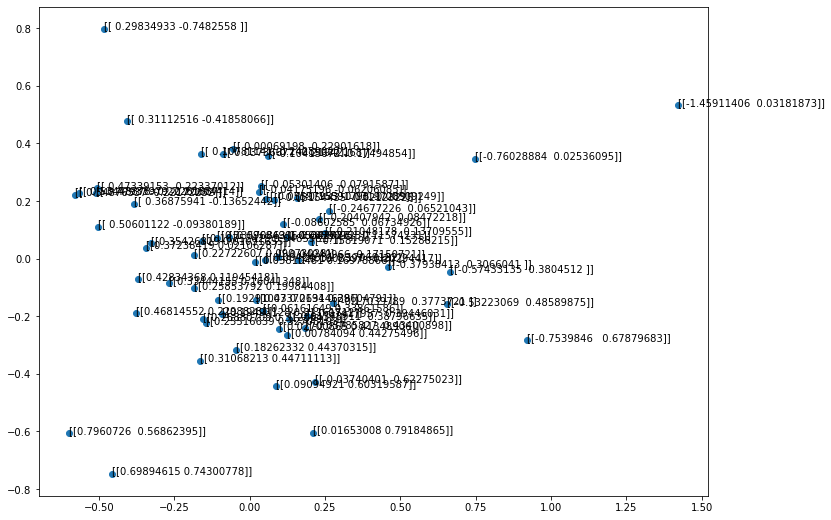

In [11]:
# 使用简单numpy实现GCN
import networkx as nx
from networkx import to_numpy_matrix
import matplotlib.pyplot as plt
import numpy as np
#加入PCA
from sklearn.decomposition import PCA

# 对网络G进行可视化
def plot_graph(G):
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    nx.draw_networkx(G, pos, edges=edges);
    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_size=300, node_color='r', alpha=0.8)
    nx.draw_networkx_edges(G, pos, edgelist=edges,alpha =0.4)
    plt.show()

# 数据加载，构造图
G = nx.read_gml('dolphins.gml')
#print(G)
#print(type(G))

# 可视化
plot_graph(G)
print(list(G.nodes()))


# 构建GCN，计算A_hat和D_hat矩阵
order = sorted(list(G.nodes()))
#按照字母顺序排序
print(order)
A = to_numpy_matrix(G, nodelist=order)
#邻接矩阵
print('A=\n', A) 

# 生成对角矩阵
I = np.eye(G.number_of_nodes())
A_hat = A + I
print('A_hat=\n', A_hat)

# D_hat为A_hat的度矩阵
D_hat = np.array(np.sum(A_hat, axis=0))[0]
print('D_hat=\n', D_hat)
# 得到对角线上的元素
D_hat = np.matrix(np.diag(D_hat))
print('D_hat=\n', D_hat)


# 初始化权重, normal 正态分布 loc均值 scale标准差
W_1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 4))
W_2 = np.random.normal(loc=0, size=(W_1.shape[1], 2))
print('W_1=\n', W_1)
print('W_2=\n', W_2)


# x<0时 结果=0; x>=0时，结果=x
def relu(x):
    return(abs(x)+x)/2

# 叠加GCN层，这里只使用单位矩阵作为特征表征，即每个节点被表示为一个 one-hot 编码的类别变量
def gcn_layer(A_hat, D_hat, X, W):
	return relu(D_hat**-1 * A_hat * X * W)
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
print('output=\n', output)
# 提取特征表征
feature_representations = {}
nodes = list(G.nodes())
for i in range(len(nodes)):
    feature_representations[nodes[i]] = np.array(output)[i]
print('feature_representations=\n', feature_representations)



def plot_nodes(dolphin_list):

    # 减少到2维
    pca = PCA(n_components=2)
    result = pca.fit_transform(dolphin_list) 
    #print(result)
    # 绘制节点向量
    plt.figure(figsize=(12,9))
    # 创建一个散点图的投影
    plt.scatter(result[:, 0], result[:, 1])
    for i, dolphin in enumerate(dolphin_list):
        plt.annotate(dolphin, xy=(result[i, 0], result[i, 1]))
    plt.show()
plot_nodes(output)



# 尝试去掉激活函数relu，重新运行一遍，发现效果反而更好
def gcn_layer(A_hat, D_hat, X, W):
    return D_hat**-1 * A_hat * X * W
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
print("output(去掉relu)=\n:",output)


plot_nodes(output)


